# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [ ]:
The data provided is related to 17 marketing campaigns. This was between May 2008 and November 2010, corresponding to a total of 79354 contacts.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
#The business objective is to develop a predictive model to accurately identify bank clients likely to subscribe to a term deposit, 
#enabling targeted marketing campaigns to optimize resource allocation and increase subscription rates.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
# Coerce categorical variables to 'category'
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                      'contact', 'month', 'day_of_week', 'poutcome']
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Coerce target variable 'y' to boolean
df['y'] = df['y'].map({'yes': True, 'no': False}).astype('bool')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [ ]:
# EDA Follows

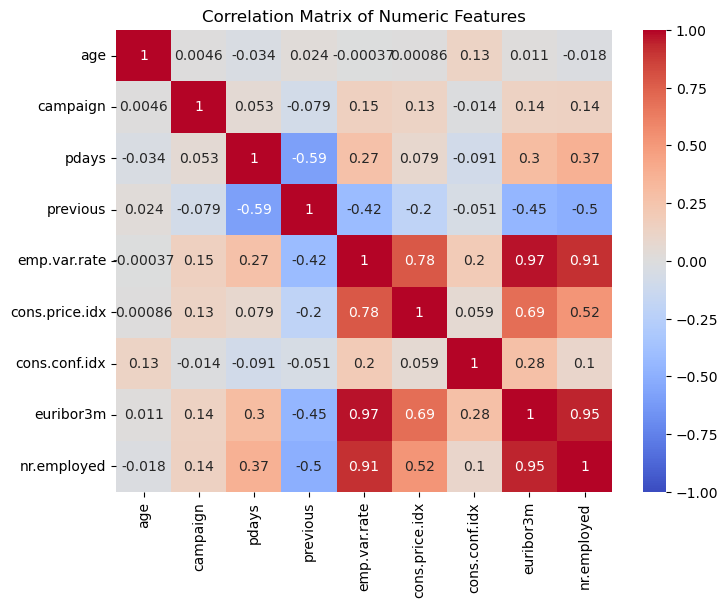

In [43]:
# examine correlations between numeric features
numeric_columns = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                  'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

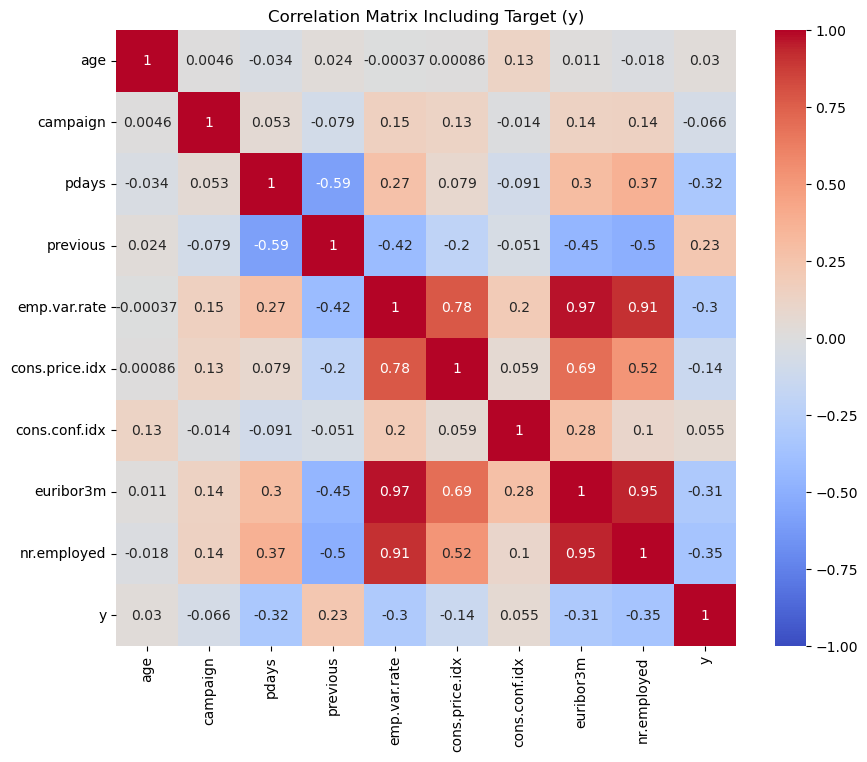

In [45]:
#including y in numeric columns to examine correlations
num_columns = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                  'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
correlation_matrix = df[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix Including Target (y)')
plt.show()

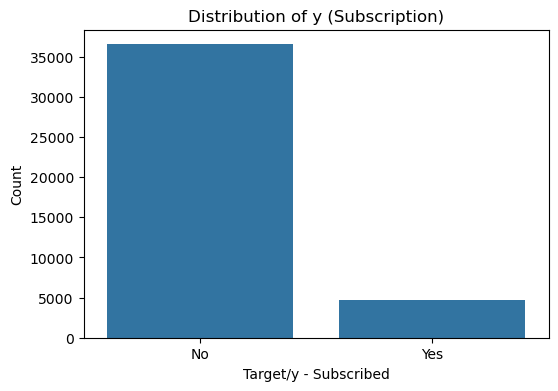

Class Distribution:
y
False    36548
True      4640
Name: count, dtype: int64


In [46]:
# examine distribution of target -> y
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('Distribution of y (Subscription)')
plt.xlabel('Target/y - Subscribed')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()
print(f"Class Distribution:\n{df['y'].value_counts()}")

In [ ]:
#Above plot shows that the data is heavily imbalanced

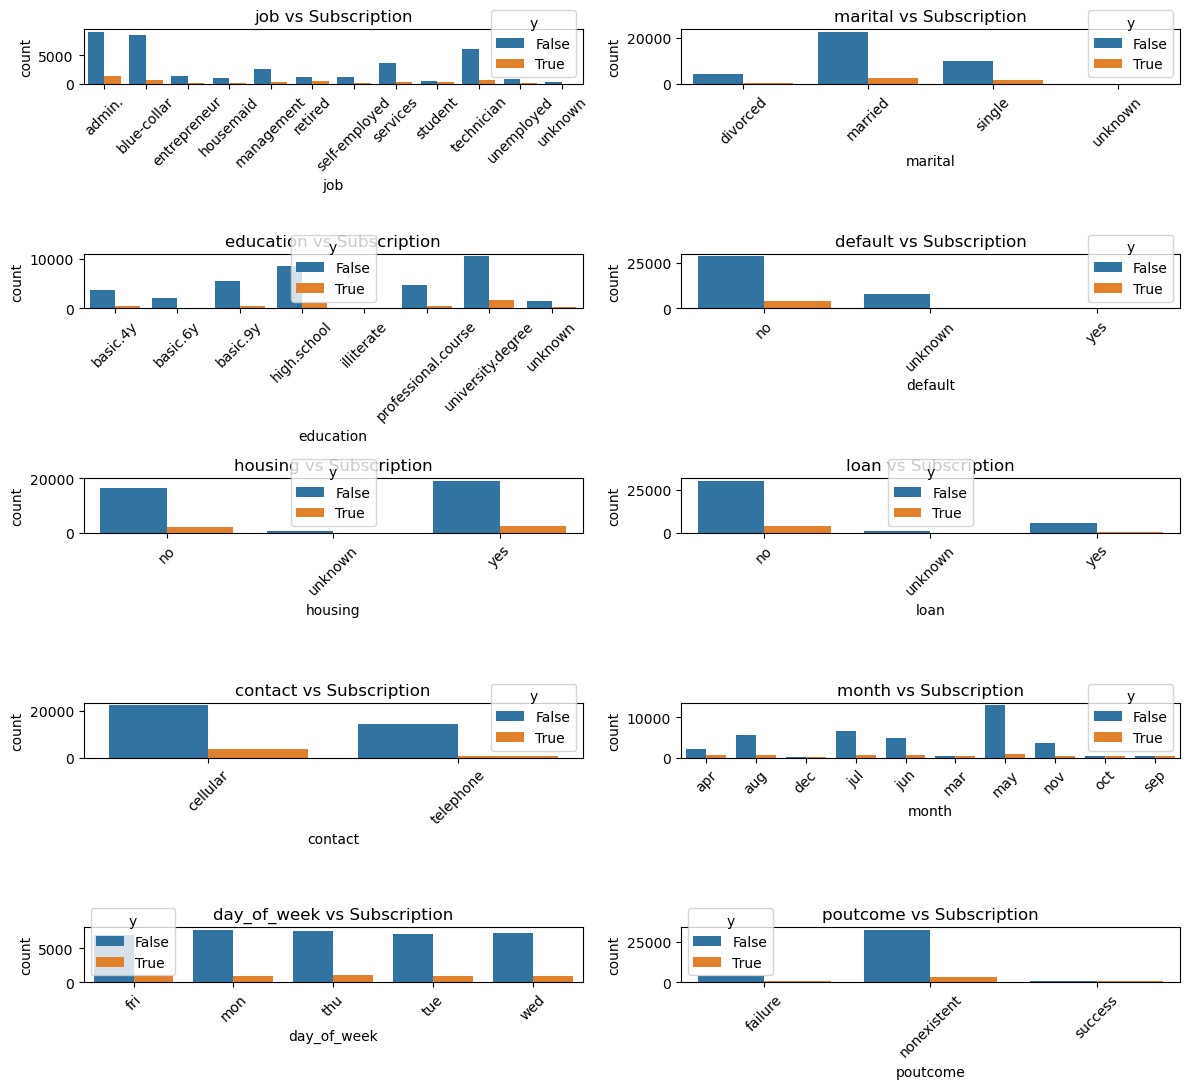

In [47]:
# examine distribution of categorical features and relationship with target-y
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                      'contact', 'month', 'day_of_week', 'poutcome']
plt.figure(figsize=(12, 11))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(5, 2, i)
    sns.countplot(x=col, hue='y', data=df)
    plt.title(f'{col} vs Subscription')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

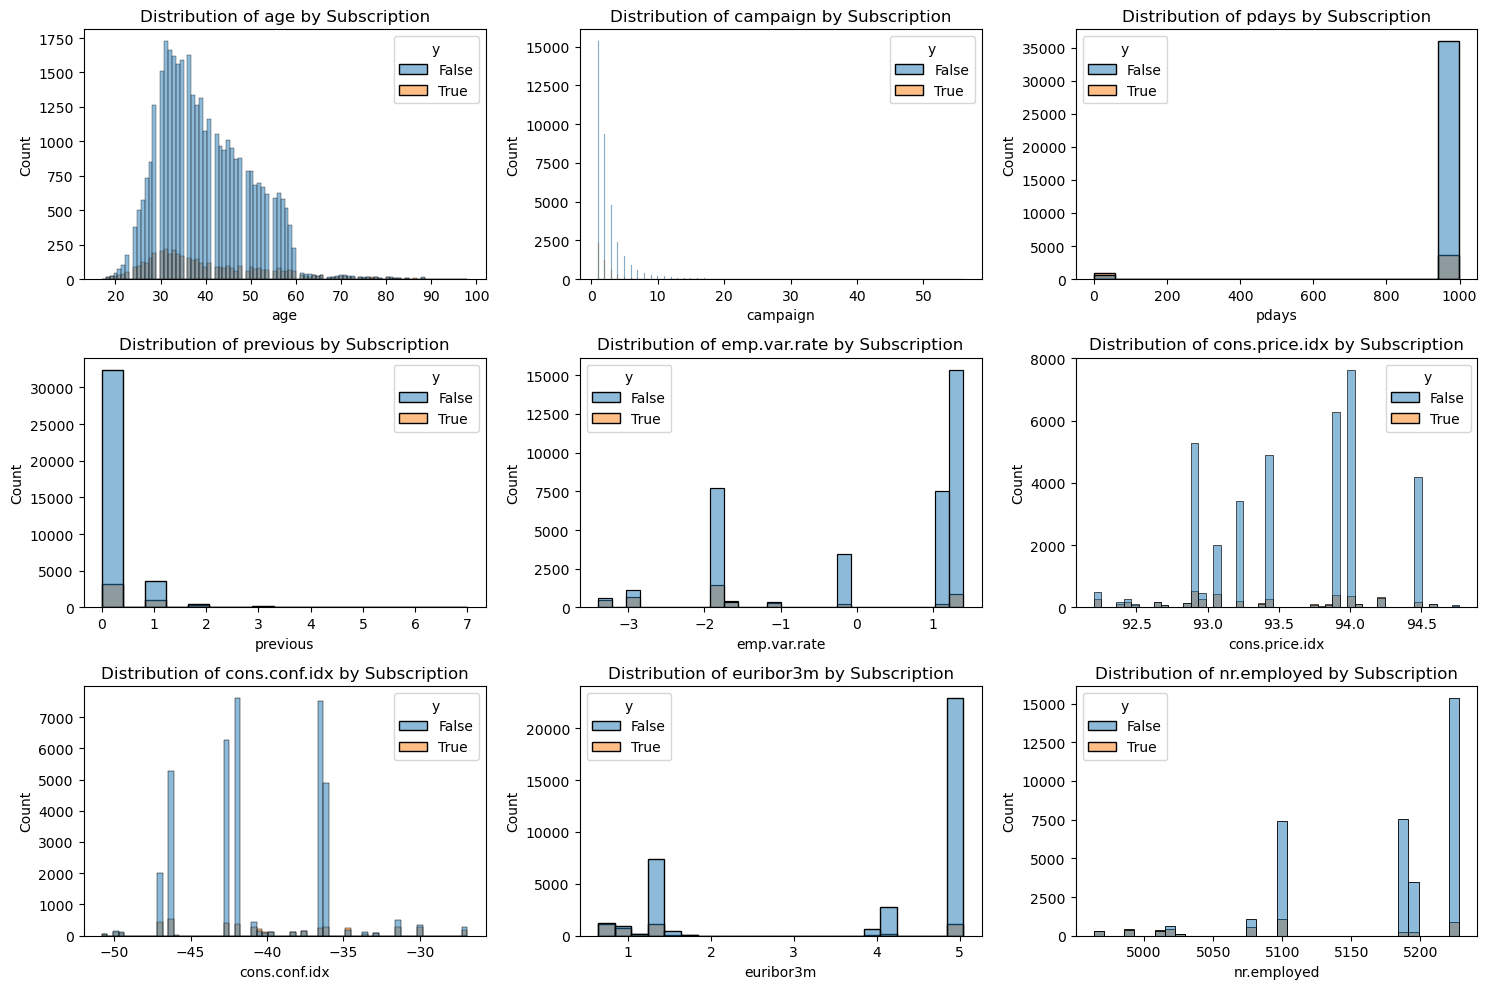

In [48]:
# # examine distribution of numeric features and relationship with target-y
numeric_columns = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
                  'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=col, hue='y')
    plt.title(f'Distribution of {col} by Subscription')
plt.tight_layout()
plt.show()

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [75]:
#Prepare features for X and the target column (y) for modeling
#Dropped duration for a realistic model
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
            'contact', 'month', 'day_of_week', 'campaign', 'pdays',
            'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
            'euribor3m', 'nr.employed']
target = 'y'
X = df[features]
y = df[target]

#encoding and transformations will be done after splitting the data into train and test sets

In [76]:
print(y.unique())

[False  True]


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [77]:
# Split data into training and test sets (as per CRISP-DM: 2/3 train, 1/3 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [78]:
# encoding and transformations
# One-hot encoding for categorical features
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                      'contact', 'month', 'day_of_week', 'poutcome']
X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True, dtype=int)

# Encode target variable y to binary (1 for 'yes', 0 for 'no')
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Standardize numeric features after split
numeric_columns = ['age', 'campaign', 'pdays', 'previous',
                  'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Examine the shape of X and y
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(27595, 52)
(13593, 52)
(27595,)
(13593,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [79]:
# Calculate class distribution
class_counts = y.value_counts()
class_proportions = y.value_counts(normalize=True)

# Print class distribution
print("Class Distribution:")
print(class_counts)
print("\nClass Proportions:")
print(class_proportions)

# Baseline accuracy: Proportion of the majority class - since always predicting "no" would be correct 88.7% of the time
baseline_accuracy = class_proportions.max()
print(f"\nBaseline Accuracy (Majority Class Classifier): {baseline_accuracy:.2f}")

Class Distribution:
y
False    36548
True      4640
Name: count, dtype: int64

Class Proportions:
y
False    0.887346
True     0.112654
Name: proportion, dtype: float64

Baseline Accuracy (Majority Class Classifier): 0.89


In [ ]:
# This was already seen from the bar plot above in the EDA section

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [80]:
from sklearn.linear_model import LogisticRegression
import time

# Initialize logistic Regresion model
model_lr = LogisticRegression(random_state=42, max_iter=1000)

# Measure training time and fit the model
start_time = time.time()
model_lr.fit(X_train, y_train)
train_time_lr = time.time() - start_time

# Predict on train and test sets
y_pred_lr_train = model_lr.predict(X_train)
y_pred_lr = model_lr.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [87]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Evaluate model
print(f"Train Time: {train_time_lr:.2f} seconds")
#print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
#print("ROC-AUC:", roc_auc_score(y_test, y_pred_lr))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_lr):.2f}")
print("\nClassification Report:\n\n", classification_report(y_test, y_pred_lr, target_names=['No', 'Yes']))

Train Time: 0.10 seconds
Accuracy: 0.90
ROC-AUC: 0.60

Classification Report:

               precision    recall  f1-score   support

          No       0.91      0.99      0.95     12056
         Yes       0.68      0.22      0.34      1537

    accuracy                           0.90     13593
   macro avg       0.79      0.60      0.64     13593
weighted avg       0.88      0.90      0.88     13593



### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [83]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model with default settings (n_neighbors=5)
model_knn = KNeighborsClassifier()

# Measure training time and fit the model
start_time = time.time()
model_knn.fit(X_train, y_train)
train_time_knn = time.time() - start_time

# Predict 
y_pred_knn_train = model_knn.predict(X_train)
y_pred_knn = model_knn.predict(X_test)

# Print results
print(f"Train Time: {train_time_knn:.2f} seconds")
#print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
#print("ROC-AUC:", roc_auc_score(y_test, y_pred_knn))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_knn):.2f}")
print("\nClassification Report:\n\n", classification_report(y_test, y_pred_knn, target_names=['No', 'Yes']))

Train Time: 0.01 seconds
Accuracy: 0.89
ROC-AUC: 0.63

Classification Report:

               precision    recall  f1-score   support

          No       0.91      0.97      0.94     12056
         Yes       0.52      0.29      0.37      1537

    accuracy                           0.89     13593
   macro avg       0.72      0.63      0.66     13593
weighted avg       0.87      0.89      0.88     13593



In [85]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model with default settings
model_dt = DecisionTreeClassifier(random_state=42)

# Measure training time and fit the model
start_time = time.time()
model_dt.fit(X_train, y_train)
train_time_dt = time.time() - start_time

# Predict 
y_pred_dt_train = model_dt.predict(X_train)
y_pred_dt = model_dt.predict(X_test)

# Print results
print(f"Train Time: {train_time_dt:.2f} seconds")
#print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}")
#print("ROC-AUC:", roc_auc_score(y_test, y_pred_dt))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_dt):.2f}")
print("\nClassification Report:\n\n", classification_report(y_test, y_pred_dt, target_names=['No', 'Yes']))

Train Time: 0.11 seconds
Accuracy: 0.84
ROC-AUC: 0.63

Classification Report:

               precision    recall  f1-score   support

          No       0.92      0.91      0.91     12056
         Yes       0.32      0.35      0.33      1537

    accuracy                           0.84     13593
   macro avg       0.62      0.63      0.62     13593
weighted avg       0.85      0.84      0.85     13593



In [86]:
from sklearn.svm import SVC

# Initialize SVM model with default settings
model_svm = SVC(random_state=42, probability=True)

# Measure training time and fit the model
start_time = time.time()
model_svm.fit(X_train, y_train)
train_time_svm = time.time() - start_time

# Predict
y_pred_svm_train = model_svm.predict(X_train)
y_pred_svm = model_svm.predict(X_test)

# Print results
print(f"Train Time: {train_time_svm:.2f} seconds")
#print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
#print("ROC-AUC:", roc_auc_score(y_test, y_pred_svm))
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_svm):.2f}")
print("\nClassification Report:\n\n", classification_report(y_test, y_pred_svm, target_names=['No', 'Yes']))

Train Time: 88.05 seconds
Accuracy: 0.90
ROC-AUC: 0.62

Classification Report:

               precision    recall  f1-score   support

          No       0.91      0.98      0.95     12056
         Yes       0.65      0.25      0.36      1537

    accuracy                           0.90     13593
   macro avg       0.78      0.62      0.65     13593
weighted avg       0.88      0.90      0.88     13593



In [88]:
# Calculate accuracies for each model and storing to results - list of dictionaries
results = [
    {
        'Model': 'Logistic Regression',
        'Train Time': train_time_lr,
        'Train Accuracy': accuracy_score(y_train, y_pred_lr_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_lr)
    },
    {
        'Model': 'KNN',
        'Train Time': train_time_knn,
        'Train Accuracy': accuracy_score(y_train, y_pred_knn_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_knn)
    },
    {
        'Model': 'Decision Tree',
        'Train Time': train_time_dt,
        'Train Accuracy': accuracy_score(y_train, y_pred_dt_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_dt)
    },
    {
        'Model': 'SVM',
        'Train Time': train_time_svm,
        'Train Accuracy': accuracy_score(y_train, y_pred_svm_train),
        'Test Accuracy': accuracy_score(y_test, y_pred_svm)
    }
]

# Create DataFrame
results_df = pd.DataFrame(results)

# Round numeric columns for readability
results_df[['Train Time', 'Train Accuracy', 'Test Accuracy']] = results_df[['Train Time', 'Train Accuracy', 'Test Accuracy']].round(2)

# Print DataFrame
print("Model Comparison:")
print(results_df[['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy']])

Model Comparison:
                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression        0.10            0.90           0.90
1                  KNN        0.01            0.91           0.89
2        Decision Tree        0.11            1.00           0.84
3                  SVM       88.05            0.91           0.90


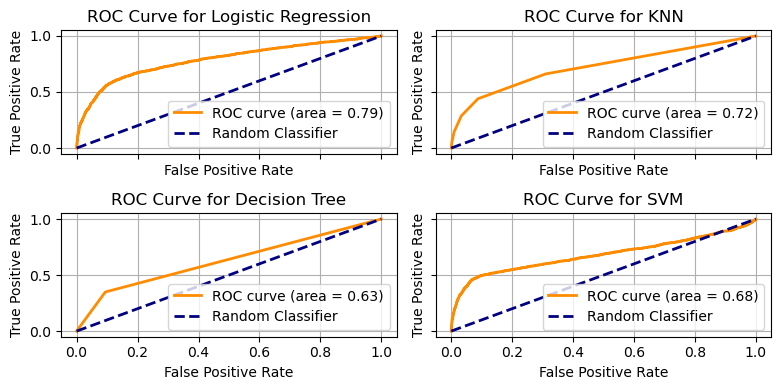

In [89]:
#Draw ROC curves
# Define models
models = {
    'Logistic Regression': model_lr,
    'KNN': model_knn,
    'Decision Tree': model_dt,
    'SVM': model_svm
}

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 4), sharex=True, sharey=True)

# Flatten axes for easier iteration
axes = axes.flatten()

# Generate ROC curve for each model
for idx, (model_name, model) in enumerate(models.items()):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    axes[idx].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[idx].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    axes[idx].set_xlabel('False Positive Rate')
    axes[idx].set_ylabel('True Positive Rate')
    axes[idx].set_title(f'ROC Curve for {model_name}')
    axes[idx].legend(loc="lower right")
    axes[idx].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Logistic Regression Feature Importance (Top 10):
                 Feature  Logistic Regression Importance
4           emp.var.rate                          2.1925
41             month_mar                          1.2971
5         cons.price.idx                          1.0674
36     contact_telephone                          0.7811
51      poutcome_success                          0.5518
43             month_nov                          0.5392
40             month_jun                          0.5275
7              euribor3m                          0.5071
50  poutcome_nonexistent                          0.4966
42             month_may                          0.4868


<Axes: xlabel='Feature'>

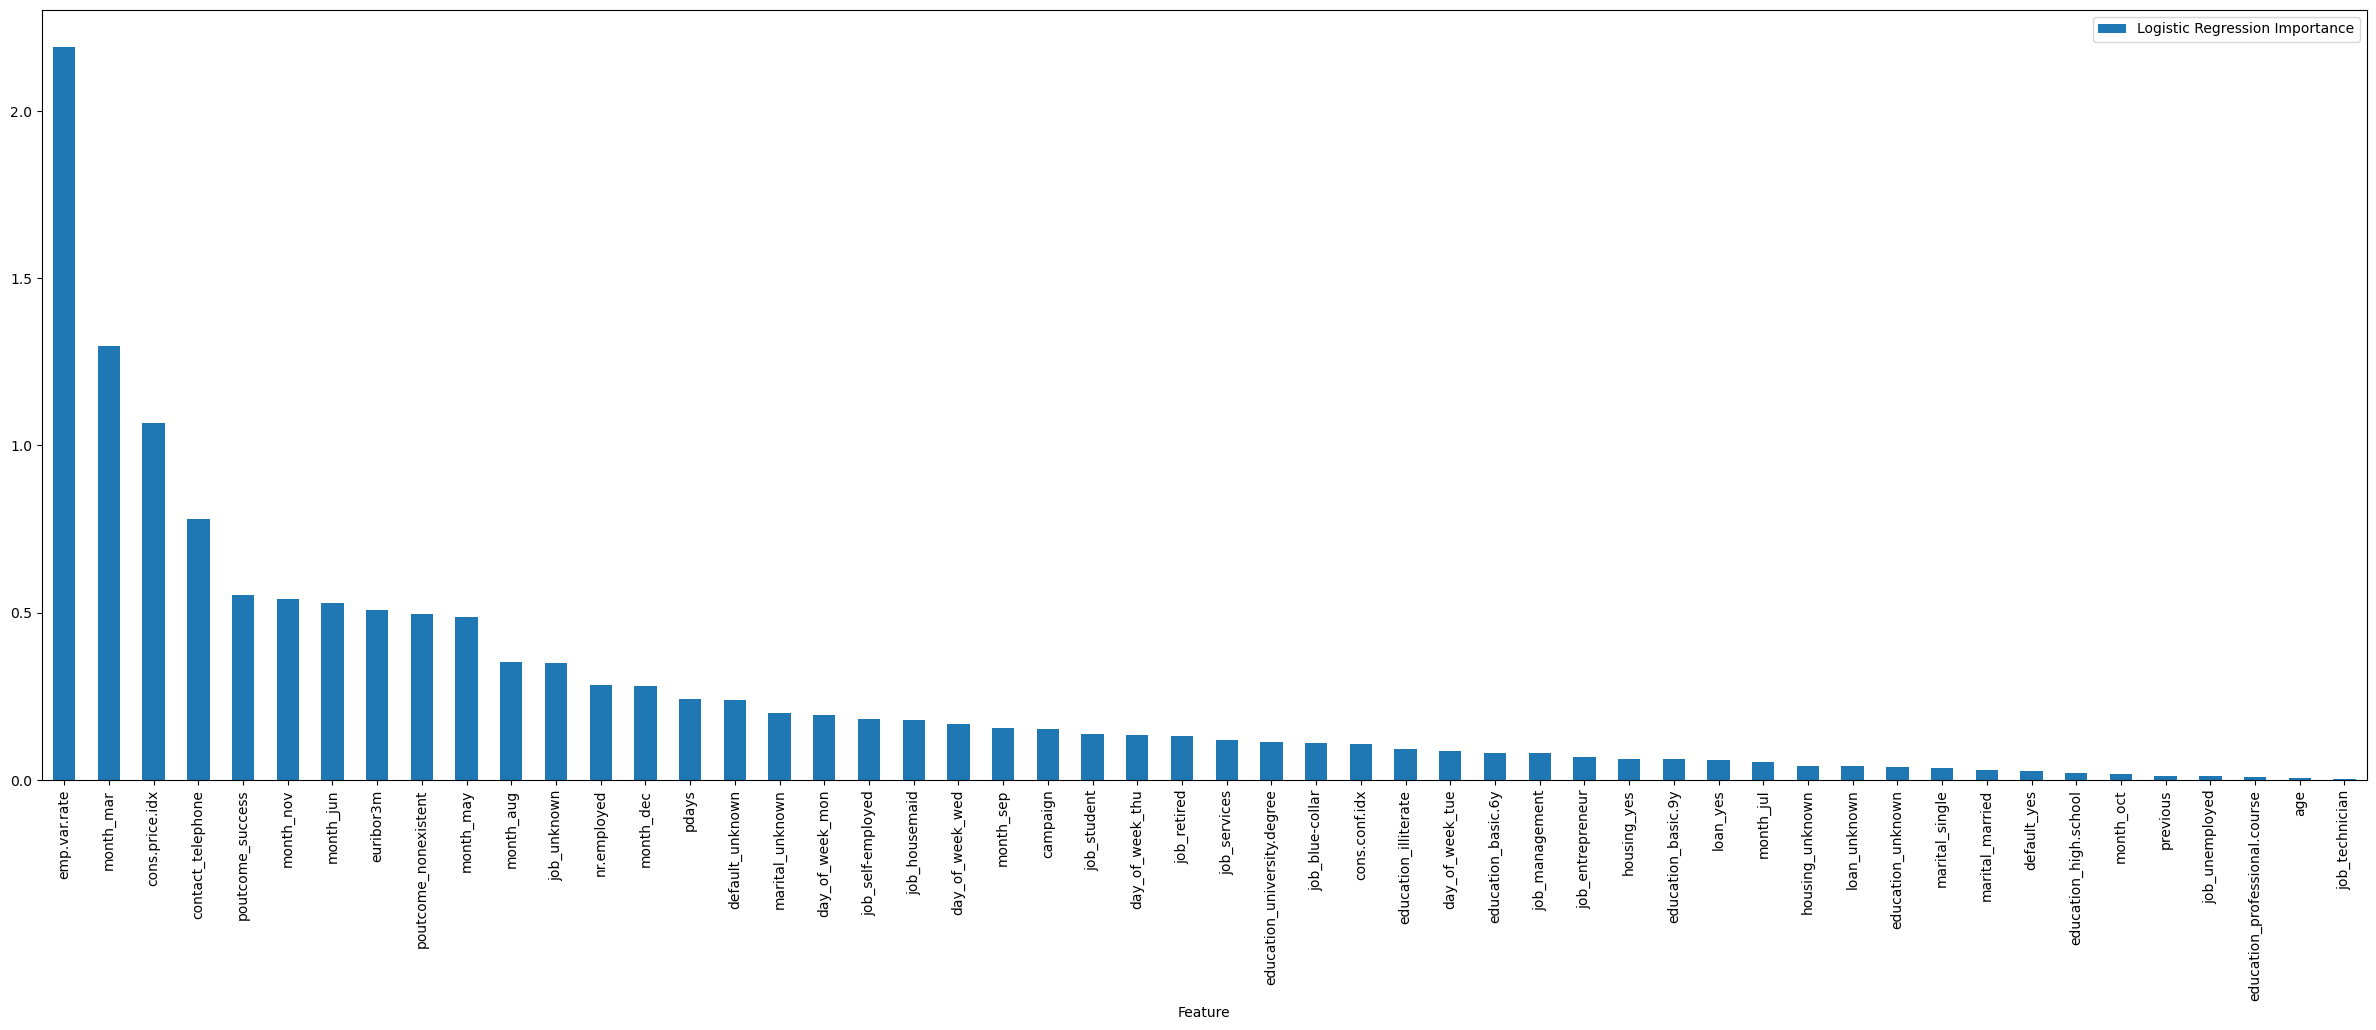

In [90]:
#Get feature importances for the model with highes test accuracy - logistic regression

import numpy as np

# Extract feature importance (absolute coefficients)
feature_names = X_train.columns
importances = np.abs(model_lr.coef_[0])

# Create DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Logistic Regression Importance': importances
})

# Sort by importance and print top 10
importance_df = importance_df.sort_values(by='Logistic Regression Importance', ascending=False)
print("\nLogistic Regression Feature Importance (Top 10):")
print(importance_df.head(10).round(4))

#plotting the features by importance
importance_df.plot.bar(x='Feature', y='Logistic Regression Importance', figsize=(30, 10))

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Training Logistic Regression...
Training KNN...
Training Decision Tree...
Training SVM...


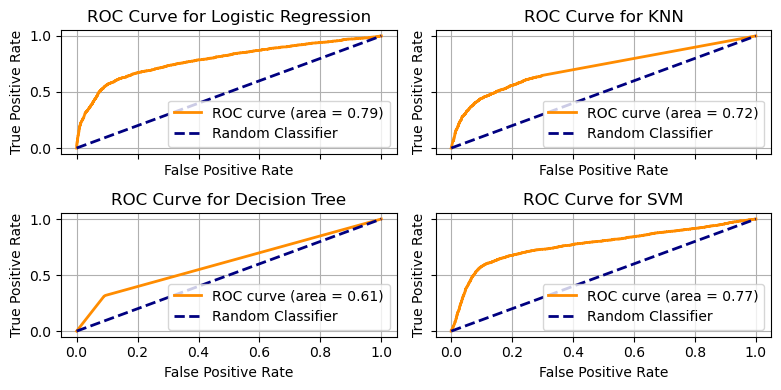


Model Comparison (Class Weighted, Top 20 Features):
                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression        0.07            0.83           0.83
1                  KNN        0.01            1.00           0.88
2        Decision Tree        0.12            1.00           0.84
3                  SVM      100.08            0.86           0.85


In [74]:
# Initialize models with class weighting
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'KNN': KNeighborsClassifier(weights='distance'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'SVM': SVC(random_state=42, class_weight='balanced', probability=True)  
}

# Store results
results = []

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 4), sharex=True, sharey=True)
axes = axes.flatten()

# Train, evaluate, and plot ROC curves for each model
for idx, (model_name, model) in enumerate(models.items()):
    print(f"Training {model_name}...")
    
    # Measure training time and fit model
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    # Predict on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store results
    results.append({
        'Model': model_name,
        'Train Time': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })
    
    # Compute ROC curve 
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve in subplot
    axes[idx].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[idx].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    axes[idx].set_xlabel('False Positive Rate')
    axes[idx].set_ylabel('True Positive Rate')
    axes[idx].set_title(f'ROC Curve for {model_name}')
    axes[idx].legend(loc="lower right")
    axes[idx].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Create and print DataFrame
results_df = pd.DataFrame(results)
results_df[['Train Time', 'Train Accuracy', 'Test Accuracy']] = results_df[['Train Time', 'Train Accuracy', 'Test Accuracy']].round(2)
print("\nModel Comparison (Class Weighted, Top 20 Features):")
print(results_df[['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy']])

In [67]:
#Repeating with select features - top features from importance list from model_lr
features = ['job', 'marital', 'default', 'housing', 'loan',
            'contact', 'month', 'day_of_week', 'campaign', 'pdays',
            'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
            'euribor3m', 'nr.employed']
target = 'y'
X2 = df[features]
y = df[target]

# Split data into training and test sets (as per CRISP-DM: 2/3 train, 1/3 test)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.33, random_state=42)

# encoding and transformations
# One-hot encoding for categorical features
categorical_columns = ['job', 'marital', 'default', 'housing', 'loan',
                      'contact', 'month', 'day_of_week', 'poutcome']
X2_train = pd.get_dummies(X2_train, columns=categorical_columns, drop_first=True, dtype=int)
X2_test = pd.get_dummies(X2_test, columns=categorical_columns, drop_first=True, dtype=int)

# Encode target variable y to binary (1 for 'yes', 0 for 'no')
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Standardize numeric features after split
numeric_columns = ['campaign', 'pdays', 'previous',
                  'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = StandardScaler()
X2_train[numeric_columns] = scaler.fit_transform(X2_train[numeric_columns])
X2_test[numeric_columns] = scaler.transform(X2_test[numeric_columns])

# Examine the shape of X and y
print(X2_train.shape)
print(X2_test.shape)
print(y_train.shape)
print(y_test.shape)

(27595, 44)
(13593, 44)
(27595,)
(13593,)


Training Logistic Regression...
Training KNN...
Training Decision Tree...
Training SVM...


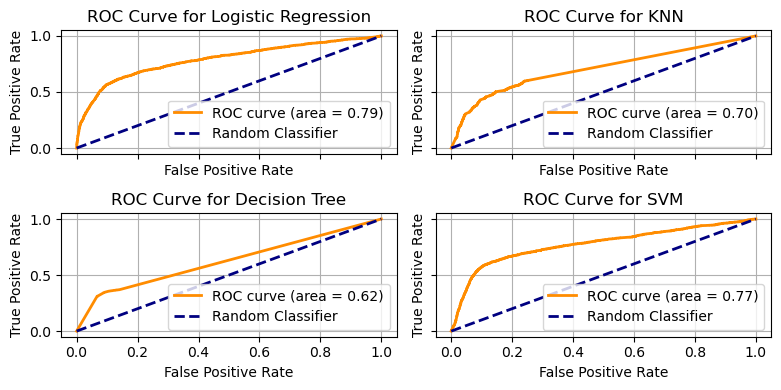


Model Comparison (Class Weighted, Top Features):
                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression        0.07            0.83           0.83
1                  KNN        0.01            0.97           0.88
2        Decision Tree        0.08            0.95           0.81
3                  SVM       99.59            0.85           0.85


In [73]:
# Repeating models with class weighting and different set of features (X2) - dropped age and education from X as they showed low importance

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'KNN': KNeighborsClassifier(weights='distance'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'SVM': SVC(random_state=42, class_weight='balanced', probability=True)  # Added probability=True
}

# Store results
results = []

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(8, 4), sharex=True, sharey=True)
axes = axes.flatten()

# Train, evaluate, and plot ROC curves for each model
for idx, (model_name, model) in enumerate(models.items()):
    print(f"Training {model_name}...")
    
    # Measure training time and fit model
    start_time = time.time()
    model.fit(X2_train, y_train)
    train_time = time.time() - start_time
    
    # Predict on train and test sets
    y_train_pred = model.predict(X2_train)
    y_test_pred = model.predict(X2_test)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store results
    results.append({
        'Model': model_name,
        'Train Time': train_time,
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy
    })
    
    # Compute ROC curve and AUC
    y_pred_proba = model.predict_proba(X2_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve in subplot
    axes[idx].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[idx].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    axes[idx].set_xlabel('False Positive Rate')
    axes[idx].set_ylabel('True Positive Rate')
    axes[idx].set_title(f'ROC Curve for {model_name}')
    axes[idx].legend(loc="lower right")
    axes[idx].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Create and print DataFrame
results_df = pd.DataFrame(results)
results_df[['Train Time', 'Train Accuracy', 'Test Accuracy']] = results_df[['Train Time', 'Train Accuracy', 'Test Accuracy']].round(2)
print("\nModel Comparison (Class Weighted, Top Features):")
print(results_df[['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy']])

In [69]:
#Cross validation

Best max_depth: 5
Train Time (GridSearchCV): 2.52 seconds
Accuracy: 0.8420510556904289
ROC-AUC: 0.7338435867923232

Classification Report:

               precision    recall  f1-score   support

          No       0.94      0.87      0.91     12056
         Yes       0.37      0.59      0.46      1537

    accuracy                           0.84     13593
   macro avg       0.66      0.73      0.68     13593
weighted avg       0.88      0.84      0.86     13593



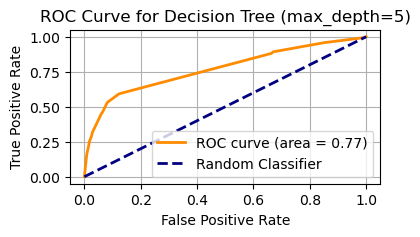

In [72]:
# Decision tree w/GridsearchCV
# Define parameter grid for max_depth
param_grid = {'max_depth': [3, 5, 7, 10, 15, None]}

# Initialize Decision Tree model with class weighting
base_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Initialize GridSearchCV with 5-fold cross-validation, scoring by ROC-AUC
grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Measure training time and fit GridSearchCV
start_time = time.time()
grid_search.fit(X_train, y_train)
train_time = time.time() - start_time

# Get best model and parameters
best_model = grid_search.best_estimator_
best_max_depth = grid_search.best_params_['max_depth']

# Predict on train and test sets with best model
y_pred_dt_train = best_model.predict(X_train)
y_pred_dt_test = best_model.predict(X_test)

# Evaluate the model
print(f"Best max_depth: {best_max_depth}")
print(f"Train Time (GridSearchCV): {train_time:.2f} seconds")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_test))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_dt_test))
print("\nClassification Report:\n\n", classification_report(y_test, y_pred_dt_test, target_names=['No', 'Yes']))

# Plot ROC curve for the best model
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(4, 2))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Decision Tree (max_depth={best_max_depth})')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Best n_neighbors: 20
Train Time (GridSearchCV): 1.3203 seconds
Accuracy: 0.8936217170602516
ROC-AUC: 0.6173084216834128

Classification Report:

               precision    recall  f1-score   support

          No       0.91      0.97      0.94     12056
         Yes       0.56      0.26      0.36      1537

    accuracy                           0.89     13593
   macro avg       0.74      0.62      0.65     13593
weighted avg       0.87      0.89      0.88     13593



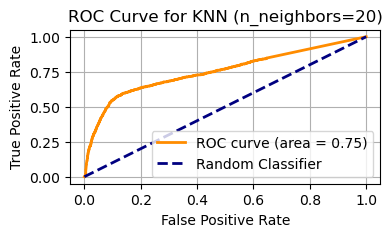

In [71]:
# KNN w/GridsearchCV
# Define parameter grid for n_neighbors
param_grid = {'n_neighbors': [3, 5, 7, 10, 15, 20]}

# Initialize KNN model with distance-based weighting
base_model = KNeighborsClassifier(weights='distance')

# Set up GridSearchCV with 5-fold cross-validation, scoring by ROC-AUC
grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Measure training time and fit GridSearchCV
start_time = time.time()
grid_search.fit(X_train, y_train)
train_time = time.time() - start_time

# Get best model and parameters
best_model = grid_search.best_estimator_
best_n_neighbors = grid_search.best_params_['n_neighbors']

# Predict on train and test sets with best model
y_pred_knn_train = best_model.predict(X_train)
y_pred_knn_test = best_model.predict(X_test)

# Evaluate model
print(f"Best n_neighbors: {best_n_neighbors}")
print(f"Train Time (GridSearchCV): {train_time:.4f} seconds")
print("Accuracy:", accuracy_score(y_test, y_pred_knn_test))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_knn_test))
print("\nClassification Report:\n\n", classification_report(y_test, y_pred_knn_test, target_names=['No', 'Yes']))

# Plot ROC curve for the best model
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(4, 2))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for KNN (n_neighbors={best_n_neighbors})')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

##### Questions